# Skills Test One

## Problem 1.
Use dynamic programming to write a program to make change using as few coins as possible.  Suppose that you've got an infinite supply of coins in several denominations.  Suppose further that an integer from 1 to 99 cents represents the amount you must represent with coins.  Suppose that the coin denominations are flexible, but always include a coin worth one cent.  
1a.  Show an equation relating the best value at stage "m" to a maximization over earlier stages.    
1b.  Write a python program to solve the recursion.  



# equation relating best value at stage "m": $C(p) = min_i{C(p-v_i)} + 1$

In [105]:
"""Use dynamic programming to write a program to make change using as few coins as possible. Suppose that you've got
an infinite supply of coins in several denominations. Suppose further that an integer from 1 to 99 cents
represents the amount you must represent with coins. Suppose that the coin denominations are flexible, but always
include a coin worth one cent. 1a. Show an equation relating the best value at stage "m" to a maximization over
earlier stages. 1b. Write a python program to solve the recursion. """


def make_change(denominations_list=[], amount=0):
    """
    Given a list of currency and the target value, return the minimum number of currency and a list of values.
    Dynamic programming (DP) is an efficient solution.
    make change using as few coins as possible
    :param denominations_list:
    :param amount: integer from 1 to 99 representing cents
    :return: min number of coins
    """
    # create memo of minimum coins required at each amount
    C = [0] * (amount+1) if amount > 0 else [0]
    # print(C)

    # for each target amount we loop through the denominations
    for i in range(1, amount+1):
        t = []
        for x in denominations_list:
            if i - x >= 0:
                # print("i, x:", i, x)
                t.append(C[i-x])
        #         print(C[i-x])
        # print(t)
        C[i] = min(t) + 1
        # print(C[1])
    return C[amount]


denominations = [1, 5, 10, 25]
amt = 99
print(make_change(denominations, amt))


9


In [106]:
"""
another solution
"""

def make_change(currency=[], value=0):
    """Given a list of coins, find the minimum number of coins and which ones.
    Use dynamic programming.
    
    >>> make_change(coins=[1, 5, 10], value=10)
    (1, [10]) # 1 coin, 10 denomination
    
    >>> make_change(coins=[1, 5, 10], value=15)
    (2, [10, 5]) # 2 coins, 10 and 5 in denomination
    
    >>> make_change(coins=[5, 10], value=3)
    No solution possible
    """

    table = [None]*(value+1) # Initialize the table
    table[0] = [] 
    for i in range(1, value+1):
        for current in currency:
            if current > i: continue
            elif not table[i] or len(table[i - current]) + 1 < len(table[i]):
                if table[i - current] != None:
                    table[i] = table[i - current][:]
                    table[i].append(current)

    if table[-1] != None:
        return len(table[-1]), table[-1] # Number of coins, which coins
    else:
        return 'No solution possible'

In [107]:
assert make_change(currency=[1, 5, 10], value=10) == (1, [10])
assert make_change(currency=[1, 5, 10], value=15) == (2, [10, 5])
assert make_change(currency=[1, 5, 10], value=30) == (3, [10, 10, 10])
assert make_change(currency=[1, 5, 21, 25], value=63) == (3, [21, 21, 21])
assert make_change(currency=[5, 10], value=3) == 'No solution possible'

## Problem 2.  
Use k-nearest neighbors to build a machine learning model to predict wine quality scores from chemical measurements of the wine.  Use the white wine data set from UCI data repository.  Here's a link:  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv .  Download the csv file and store it in the same folder as this notebook so the notebook will have access to the file easily.  Or you can download the file over the internet - whichever is easier for you.  You can read the website description or look through the file to figure out how the data are formatted in the file - (usually delimited text file).  Read it into a numpy data structure in order to be able to manipulate easily.  Then do the following:  

#### Step 1.  Download the data
The download instructions are given directly above.

#### Step 2.  Scale the data
Use the package - sklearn.preprocessing.scale to scale the attributes in this set to standard form (zero mean and unit variance).  The documentation shows you how to use the function.  http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html and http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler .  The default settings on the scale function will work fine.  Be sure to do the scaling along the columns of the data matrix - not along the rows.  

#### Step 3.  Divide the data
-Divide the data set into two subsets for training and test.  
-Use 35% of the data for testing and 65% for training.  (Notice that we're not doing a separate validations set.)

#### Step 4.  Build models and 
-Use the sklearn KNN regression package to train and test.
http://scikit-learn.org/stable/modules/neighbors.html   
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor   

-Train and test KNN models over a range of k values and plot the root mean squared error on the training data and on the test data.  Plot both of these quantities on the same figure.  

-Pick the value of k that gives the best performance (lowest value of error on the test data).   

-Report best value of k and the corresponding value of the rmse.  



In [108]:
# KNN

import pandas as pd

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", ';')
# type(df.values)
# data = df.values
# data[0]
# print(data.shape)
# print(data.dropna().shape)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [109]:
x = data.drop('quality', axis=1)  # predictors
y = data.quality # target

In [110]:
import sklearn

# sklearn.preprocessing.scale(data, axis=0)

In [111]:
from sklearn.cross_validation import train_test_split
import numpy as np

#pull out 35% test set
xTrVa, xTe, yTrVa, yTe = train_test_split(x, y, test_size=0.35)

from sklearn.neighbors import KNeighborsRegressor


#set up xvalidation loop and run on sklearn knn regression for several values of "k"

#set values for some constants and initilize lists for holding answers
nxVal = 5  #number of cross-validation folds
ks = [200, 150, 100, 80, 60, 50, 40, 30, 20, 15, 10, 8, 6, 5, 3, 1]  #list of k-values to generate error vs complexity curves

trPerf = np.zeros(len(ks))  #to hold fold-by-fold training error
vaPerf = np.zeros(len(ks))  #to hold fold-by-fold validation error

for ik in range(len(ks)):
    knn = KNeighborsRegressor(n_neighbors=ks[ik])  # create instance of KNeighborsRegressor class
    knn.fit(xTrVa, yTrVa)
    #performance on training set
    trErr = knn.predict(xTrVa) - yTrVa  # training error
#     print("training error shape", trErr.shape)
#     print("mean squared error", np.mean(trErr*trErr))
    trPerf[ik] = np.mean(trErr*trErr)
    #performance on val set
    vaErr = knn.predict(xTe) - yTe
#     print(vaErr.shape)
#     print(np.mean(vaErr*vaErr))
    vaPerf[ik] = np.mean(vaErr*vaErr)

Populating the interactive namespace from numpy and matplotlib
validation rmse
[ 0.67752194  0.67273767  0.66579178  0.66357844  0.66273858  0.65718414
  0.65415999  0.64676514  0.64216327  0.64433301  0.65195918  0.65868258
  0.67013282  0.67589504  0.70670554  0.88279883]
training rmse
[ 0.70164188  0.69533061  0.68497892  0.67796075  0.66912626  0.65765203
  0.64922459  0.63547457  0.61069039  0.58150731  0.54207666  0.51594899
  0.47262366  0.4441596   0.33221629  0.        ]


`%matplotlib` prevents importing * from pylab and numpy


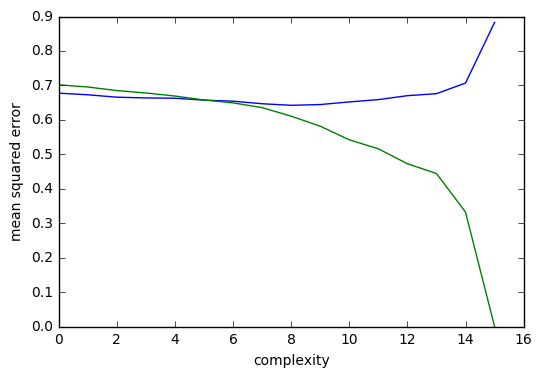

best k =  20 min value of MSE =  0.642163265306


In [112]:
%pylab inline
import matplotlib.pyplot as plt
%matplotlib inline

# print(type(vaPerf), vaPerf.size)

#form outputs
# vaMse = np.sqrt(np.mean(vaPerf))
print('validation rmse')
print(vaPerf)

# trMse = np.sqrt(np.mean(trPerf))
print('training rmse')
print(trPerf)

plot(vaPerf)
plot(trPerf)
plt.xlabel("complexity")
plt.ylabel("mean squared error")
plt.show()
kStar = ks[np.argmin(vaPerf)]
print('best k = ', kStar, 'min value of MSE = ', np.min(vaPerf))  #print best value of k and corresponding mse

pick the value of k that gives the best performance (lowest value of error on the test data)

best k =  15 min value of MSE =  0.63556851312

In [113]:
#use test data to confirm results
knnTe = KNeighborsRegressor(n_neighbors=10)
knnTe.fit(xTrVa, yTrVa)
teErr = knnTe.predict(xTe) - yTe
teMse = np.sqrt(np.mean(teErr*teErr))
print(teMse)

0.807439894775


## Discussion:
When I run this several times (starting from train/test split), I get optimum k values that bounce around between 10 and 30.  The corresponding mean square errors (MSE) are around 0.67.  Generally the test errors are slightly smaller than the best MSE from cross validation.  Occasionally, the test error will be 30% or so higher than MSE from cross validation.  I'd probably deploy with k=15 or so to be a little conservative.  

We scaled the data to zero mean and unit variance at the very beginning to see if it improves performance.



## ElasticNet CV on the same data set
For this problem we can start with the same xTrVa, xTe, yTrVa, yTe that were developed in the code above.  That's where this sample code below picks up the story. 

## Problem 3. 
Use penalized regression to build a model to predict wine quality as in the last problem.  

#### Step 1.  Instantiate member of ElasticNetCV class
-Use the sklearn.linear_model.ElasticNetCV package in sklearn.  You can find the package documentation here:  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html .  Most of the default settings for the class will work fine on this problem.  The only ones you'll want to change are: 

l1_ratio=0.5 -    You'll want to build several models with different values of l1_ratio (between say 0.01 and 1).   
normalize=False - This should be set to True   
cv=None, -        Try 5 or 10   
n_jobs=1. -        This integer determines how many cores will be use.  Setting to -1 uses all the available core.   
 
#### Step 2.  Train an ElasticNet penalized model and plot it's performance 
-Plot MSE.  Instantiate a class member of the ElasticNetCV class and then use the fit() member function (supplying training data and lables that you extracted in Problem 2).  The fit() function will perform cross-validation on a multitude of models, and calculate mean square error across the models.  In the package documentation you'll see the attribute mse_path_ .  That shows a two dimensional numpy array filled with mean square error across the test portion for each fold and model complexity (alpha value).  Plot the paths for each of the folds (columns in the mse_path_ matrix).  

#### Step 3.  Produce model coefficients for best performing model
-Extract coefficients.  The member variable coef_ has a real number coefficient for each of the attributes.  

#### Step 4.  Use penalized regression to determine variable importance.  
-Determine variable importance.  
Go through this whole sequence again, but before starting normalize the feature matrix before fitting a model to it.  Use the scale() function as you used in Problem 2.  Instantiate an ElasticNetCV object as in the first portion of this problem.  Then fit the model to the scaled versions of the training data.  Extract the coefficients and order them from the one with the largest absolute value to the smallest.  Order the names of attributes associated from largest absolute coefficient value to smallest.   


In [114]:
from sklearn.linear_model import ElasticNetCV
from math import sqrt

enet = ElasticNetCV(l1_ratio=0.5, normalize=True, cv=10, n_jobs=-1)
enet.fit(xTrVa, yTrVa), enet.mse_path_.shape  # perform cross-validation on multitude of models, and calculate MSE across the models

(ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=-1,
        normalize=True, positive=False, precompute='auto',
        random_state=None, selection='cyclic', tol=0.0001, verbose=0),
 (100, 10))

In [115]:
#mse_path shows a 2-dimensional numpy array filled with MSE across the test portion for each fold and model complexity (alpha value)
# enet.mse_path_

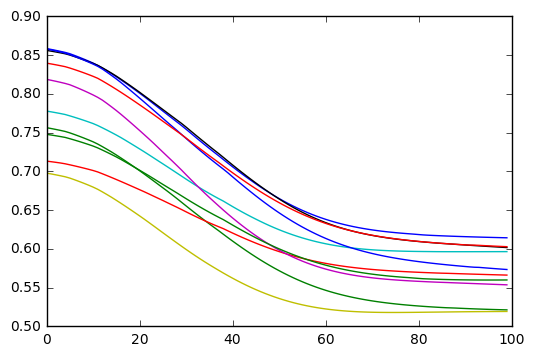

In [116]:
for i in range(10):
    plt.plot(enet.mse_path_[:,i])
plt.show()

In [142]:
# produce model coefficients for best performing model

# extract coefficients, coef_ member variable has real number coefficient for each of the attributes
# sorted(abs(enet.coef_), reverse=True)
index = argsort(abs(enet.coef_))
index

array([ 6,  5,  0,  2,  3, 10,  8,  9,  4,  1,  7])

In [118]:
# use penalized regression to determine variable importance

meanErr = np.mean(enet.mse_path_, axis=1)
minIdx = np.argmin(meanErr)
print('index of mse min', minIdx, 'Min value of rmse', sqrt(meanErr[minIdx]))

#check on test data to make sure it's in line with min from xvalidation
teErr = enet.predict(xTe) - yTe
teRmse = np.sqrt(np.mean(teErr*teErr))
print('RMSE on Test data', teRmse)

np.where(enet.alphas_ == enet.alpha_)  #find index of alpha used in ElasticNetCV predict method - same as minimum mse index

index of mse min 99 Min value of rmse 0.7556297074099242
RMSE on Test data 0.749760281838


(array([99]),)

In [119]:
import pprint
pprint.pprint(sorted(np.sqrt(enet.mse_path_[83,:]), reverse=True))  #print rmse for each of the xval sets to see if this fits within their spread

[0.78578476271716802,
 0.77984144377738385,
 0.7797696277847328,
 0.77236774988290047,
 0.7625531164862106,
 0.75441276978916627,
 0.74905809872797757,
 0.74657089831759527,
 0.72466930976258603,
 0.72004565331131509]


In [144]:
columns = data.columns
columns
[columns[i] for i in index[::-1]]

['density',
 'volatile acidity',
 'chlorides',
 'sulphates',
 'pH',
 'alcohol',
 'residual sugar',
 'citric acid',
 'fixed acidity',
 'free sulfur dioxide',
 'total sulfur dioxide']

# Normalize the feature matrix and go through the whole sequence again and fit a model to it.

In [120]:
sklearn.preprocessing.scale(data, axis=0)

array([[  1.72096961e-01,  -8.17699008e-02,   2.13280202e-01, ...,
         -3.49184257e-01,  -1.39315246e+00,   1.37870140e-01],
       [ -6.57501128e-01,   2.15895632e-01,   4.80011213e-02, ...,
          1.34184656e-03,  -8.24275678e-01,   1.37870140e-01],
       [  1.47575110e+00,   1.74519434e-02,   5.43838363e-01, ...,
         -4.36815783e-01,  -3.36667007e-01,   1.37870140e-01],
       ..., 
       [ -4.20473102e-01,  -3.79435433e-01,  -1.19159198e+00, ...,
         -2.61552731e-01,  -9.05543789e-01,   1.37870140e-01],
       [ -1.60561323e+00,   1.16673788e-01,  -2.82557040e-01, ...,
         -9.62604939e-01,   1.85757201e+00,   1.26711420e+00],
       [ -1.01304317e+00,  -6.77100966e-01,   3.78559282e-01, ...,
         -1.48839409e+00,   1.04489089e+00,   1.37870140e-01]])

In [121]:
from sklearn.cross_validation import train_test_split
import numpy as np

#pull out 35% test set
xTrVa, xTe, yTrVa, yTe = train_test_split(x, y, test_size=0.35)

from sklearn.neighbors import KNeighborsRegressor


#set up xvalidation loop and run on sklearn knn regression for several values of "k"

#set values for some constants and initilize lists for holding answers
nxVal = 5  #number of cross-validation folds
ks = [200, 150, 100, 80, 60, 50, 40, 30, 20, 15, 10, 8, 6, 5, 3, 1]  #list of k-values to generate error vs complexity curves

trPerf = np.zeros(len(ks))  #to hold fold-by-fold training error
vaPerf = np.zeros(len(ks))  #to hold fold-by-fold validation error

for ik in range(len(ks)):
    knn = KNeighborsRegressor(n_neighbors=ks[ik])  # create instance of KNeighborsRegressor class
    knn.fit(xTrVa, yTrVa)
    #performance on training set
    trErr = knn.predict(xTrVa) - yTrVa  # training error
#     print("training error shape", trErr.shape)
#     print("mean squared error", np.mean(trErr*trErr))
    trPerf[ik] = np.mean(trErr*trErr)
    #performance on val set
    vaErr = knn.predict(xTe) - yTe
#     print(vaErr.shape)
#     print(np.mean(vaErr*vaErr))
    vaPerf[ik] = np.mean(vaErr*vaErr)

Populating the interactive namespace from numpy and matplotlib
validation rmse
[ 0.66271984  0.66062251  0.65750198  0.653957    0.65077114  0.64203125
  0.63953754  0.63778361  0.64065015  0.63985747  0.64132362  0.64071611
  0.64561063  0.65182507  0.69122125  0.89154519]
training rmse
[ 0.70580548  0.69961011  0.68652714  0.68038702  0.67213364  0.66404248
  0.65138431  0.6391287   0.61372683  0.59287884  0.56061891  0.52947789
  0.49052257  0.45525605  0.35110134  0.        ]


`%matplotlib` prevents importing * from pylab and numpy


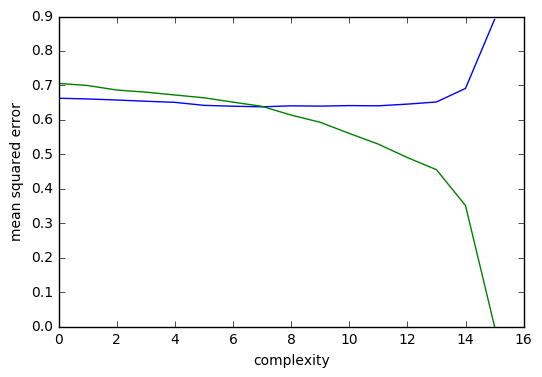

best k =  30 min value of MSE =  0.637783608682


In [122]:
%pylab inline
import matplotlib.pyplot as plt
%matplotlib inline

# print(type(vaPerf), vaPerf.size)

#form outputs
# vaMse = np.sqrt(np.mean(vaPerf))
print('validation rmse')
print(vaPerf)

# trMse = np.sqrt(np.mean(trPerf))
print('training rmse')
print(trPerf)

plot(vaPerf)
plot(trPerf)
plt.xlabel("complexity")
plt.ylabel("mean squared error")
plt.show()
kStar = ks[np.argmin(vaPerf)]
print('best k = ', kStar, 'min value of MSE = ', np.min(vaPerf))  #print best value of k and corresponding mse

In [123]:
#use test data to confirm results
knnTe = KNeighborsRegressor(n_neighbors=10)
knnTe.fit(xTrVa, yTrVa)
teErr = knnTe.predict(xTe) - yTe
teMse = np.sqrt(np.mean(teErr*teErr))
print(teMse)

0.800826832193


In [124]:
from sklearn.linear_model import ElasticNetCV
from math import sqrt

enet = ElasticNetCV(l1_ratio=0.5, normalize=True, cv=10, n_jobs=-1)
enet.fit(xTrVa, yTrVa), enet.mse_path_.shape  # perform cross-validation on multitude of models, and calculate MSE across the models

(ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=-1,
        normalize=True, positive=False, precompute='auto',
        random_state=None, selection='cyclic', tol=0.0001, verbose=0),
 (100, 10))

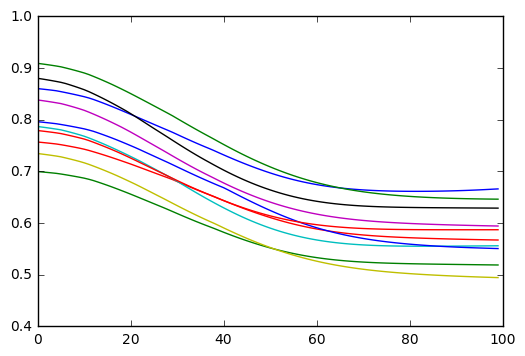

In [125]:
for i in range(10):
    plt.plot(enet.mse_path_[:,i])
plt.show()

In [140]:
# produce model coefficients for best performing model

# extract coefficients, coef_ member variable has real number coefficient for each of the attributes
index = argsort(abs(enet.coef_))
index

array([ 6,  5,  0,  2,  3, 10,  8,  9,  4,  1,  7])

In [127]:
# use penalized regression to determine variable importance

meanErr = np.mean(enet.mse_path_, axis=1)
minIdx = np.argmin(meanErr)
print('index of mse min', minIdx, 'Min value of rmse', sqrt(meanErr[minIdx]))

#check on test data to make sure it's in line with min from xvalidation
teErr = enet.predict(xTe) - yTe
teRmse = np.sqrt(np.mean(teErr*teErr))
print('RMSE on Test data', teRmse)

np.where(enet.alphas_ == enet.alpha_)  #find index of alpha used in ElasticNetCV predict method - same as minimum mse index

index of mse min 99 Min value of rmse 0.7622794818465501
RMSE on Test data 0.738521128767


(array([99]),)

In [128]:
import pprint
pprint.pprint(sorted(np.sqrt(enet.mse_path_[83,:]), reverse=True))  #print rmse for each of the xval sets to see if this fits within their spread

[0.81335415452488447,
 0.80631764232690861,
 0.7937166161236946,
 0.77344076532538131,
 0.76633219587828127,
 0.75546946458781594,
 0.74642130412656138,
 0.74516184923517326,
 0.72174751402389836,
 0.70747103482054552]


In [145]:
# order the names of attributes associated from largest absolute coefficient value to smallest.

columns = data.columns
columns
[columns[i] for i in index[::-1]]

['density',
 'volatile acidity',
 'chlorides',
 'sulphates',
 'pH',
 'alcohol',
 'residual sugar',
 'citric acid',
 'fixed acidity',
 'free sulfur dioxide',
 'total sulfur dioxide']